# Analisis Sentimen Review Shopee dengan SVM
Model klasifikasi menggunakan Support Vector Machine (SVM) dan TF-IDF untuk memproses review dari Shopee.

In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
stop_words_ind = stopwords.words('indonesian')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [3]:
df = pd.read_csv("../scraping-result/shopee_ratingnew.csv")
df.dropna(subset=["Review", "Rating"], inplace=True)
df["Label"] = df["Rating"].apply(lambda x: 1 if x >= 4 else 0)
df["CleanReview"] = df["Review"].apply(clean_text)
df.head(20)


,Username,Produk,Review,Rating,Waktu transaksi,Label,CleanReview
1,sovimamun,SKIN1004 Madagascar Centella Poremizing Tinte...,"Pengirimannya cepet, adminnya ramah pwoll, pac...",5,2025-05-31 13:36,1,pengirimannya cepet adminnya ramah pwoll packa...
14,bszw1mo_48,SKIN1004 Madagascar Centella Light Cleansing O...,Alhamdulillah produknya sampai dengan selamat ...,5,2025-05-31 13:30,1,alhamdulillah produknya sampai dengan selamat ...
47,n*****a,SKIN1004 Madagascar Centella Tone Brightening ...,Maaf ya kak tidak sesuai gambarnya karna baran...,5,2025-05-31 13:14,1,maaf ya kak tidak sesuai gambarnya karna baran...
52,o*****i,SKIN1004 Madagascar Centella Ampoule 55ml,Tekstur:cair seperti air Daya Serap:efektif ti...,5,2025-05-31 13:13,1,teksturcair seperti air daya serapefektif tida...
62,nikita_gedalya,SKIN1004 Madagascar Centella Poremizing Fresh ...,Tekstur:Kental Daya Serap:Cepat Cocok untuk:Ku...,5,2025-05-31 13:07,1,teksturkental daya serapcepat cocok untukkulit...
63,nikita_gedalya,SKIN1004 Madagascar Centella Light Cleansing O...,Tekstur:Ringan Cocok untuk:Semua kulit Aroma:C...,5,2025-05-31 13:07,1,teksturringan cocok untuksemua kulit aromacalm...
81,sil.nandia,SKIN1004 Madagascar Centella Hyalu-Cica Water-...,Original,5,2025-05-31 12:57,1,original
84,dilaeka20,SKIN1004 Madagascar Centella Tone Brightening ...,"Ga pernah gagal , emang terbaik cocok di kulit...",5,2025-05-31 12:50,1,ga pernah gagal emang terbaik cocok di kulit s...
85,dilaeka20,SKIN1004 Madagascar Centella Hyalu-Cica Water-...,"Bagus , maaf baru kasih rating hp baru soalnya...",5,2025-05-31 12:48,1,bagus maaf baru kasih rating hp baru soalnya y...
94,annanugrawati09,SKIN1004 [Centella Basic 5] Cleansing Oil+Ampo...,Terima kasih paket sdh sampai + dpt bonus 2 🥰,5,2025-05-31 12:45,1,terima kasih paket sdh sampai dpt bonus


In [4]:
vectorizer = TfidfVectorizer(stop_words=stop_words_ind)
X = vectorizer.fit_transform(df["CleanReview"])
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


d:\shopee\venv\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [5]:
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("📊 Hasil Evaluasi Model SVM:")
print(classification_report(y_test, y_pred, zero_division=0))


📊 Hasil Evaluasi Model SVM:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.99      1.00      0.99       182

    accuracy                           0.99       185
   macro avg       0.99      0.67      0.75       185
weighted avg       0.99      0.99      0.99       185



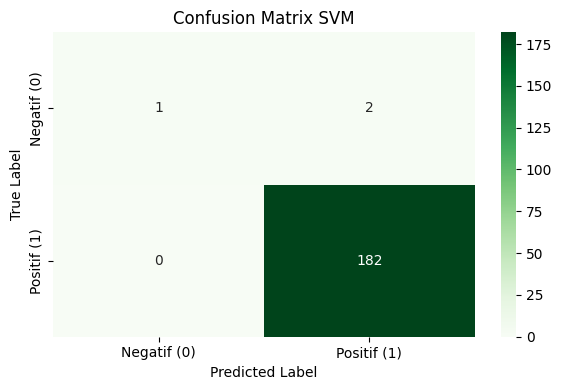

In [6]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Negatif (0)', 'Positif (1)']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix SVM')
plt.tight_layout()
plt.show()
